# part 1 a

调整likelihood 的scale，latent SDE 会有什么变化，如何解决

$$
\begin{align}
&X_t|Z_t \sim N(Z_t,scale^2)\\
&\frac{\hat{X_t}-Z_t}{scale} \sim N(0,1)\\
&\hat{X_t}  = Z_t + \epsilon *scale,\ \ \ \epsilon \sim N(0,1)
\end{align}
$$
可以看见在某一时间t，预测的$X_t$等于$Z_t$加上一定的noise，signal_noise_ratio$\frac{Z_t}{scale *\epsilon}$的大小决定了$E[Z_t]$能否接近$X_t$.

代码用的segmented_cosine的取值范围在[0,1],所以

当$\sigma \rightarrow 0$时，signal_noise_ratio $\rightarrow \infty$, $\hat{X_t} \approx Z_t$

当$\sigma =1$时，signal_noise_ratio $\approx 1$,这个时候$\hat{X_t}$受到了noise很大的影响，$E[Z_t]$没有办法很好的预测$X_t$

Text(0.5, 1.0, 'sigma=1')

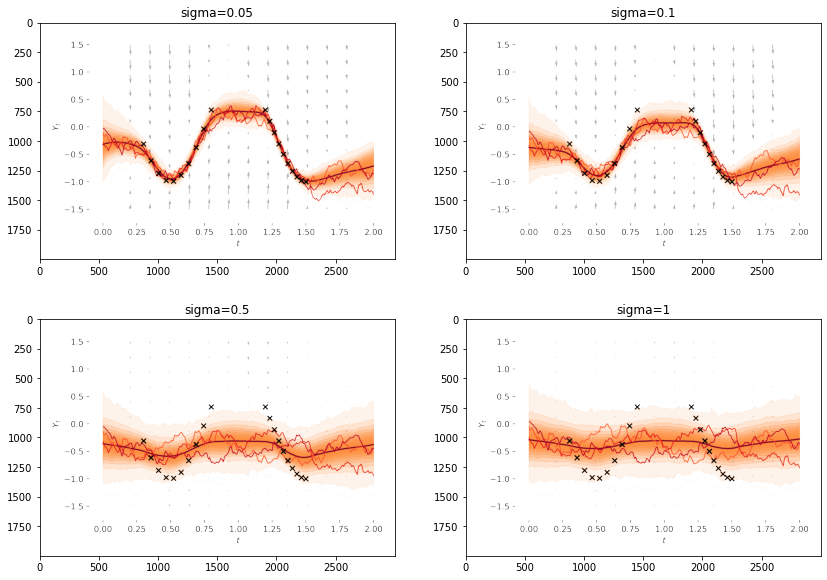

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

sigma_005=mpimg.imread('./img_part1_a/sigma_0.05.png')
sigma_01 =mpimg.imread('./img_part1_a/sigma_0.1.png')
sigma_05 =mpimg.imread('./img_part1_a/sigma_0.5.png')
sigma_1 =mpimg.imread('./img_part1_a/sigma_1.png')

fig, axes = plt.subplots(2,2,figsize=(14,10))
axes[0,0].imshow(sigma_005)
axes[0,0].set_title("sigma=0.05")
axes[0,1].imshow(sigma_01)
axes[0,1].set_title("sigma=0.1")
axes[1,0].imshow(sigma_05)
axes[1,0].set_title("sigma=0.5")
axes[1,1].imshow(sigma_1)
axes[1,1].set_title("sigma=1")

上面的图显示了当$Z_t$的范围是固定的时候，sigma越大，signal_noise_ratio越小的时候，$E[Z_t]$就越失控，橙色部分是percentile，也可以看到noise越大，percentile范围也越大，越不稳定。

根据不同的observation, 我们可以选择不同的sigma来调节signal_noise_ratio达到想要的目的，下面两张图observation和$Z_t$的范围不一样，但是我们可以控制sigma的大小，让signal_nosie_ratio保持大概一致，我们也可以看到两张图的$E[Z_t]$还是很好的趋紧于$X_t$

Text(0.5, 1.0, 'sigma=1,ratio=1')

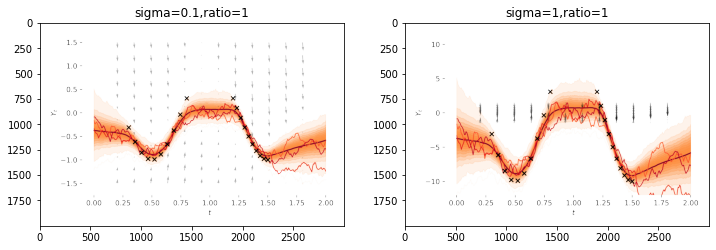

In [13]:
sigma_01=mpimg.imread('./img_part1_a/sigma_0.1.png')
sigma_1_zt_10 =mpimg.imread('./img_part1_a/sigma_1_Zt_10.png')

fig, axes = plt.subplots(1,2,figsize=(12,8))
axes[0].imshow(sigma_01)
axes[0].set_title("sigma=0.1,ratio=1")
axes[1].imshow(sigma_1_zt_10)
axes[1].set_title("sigma=1,ratio=1")

目前没有想到针对signal_noise_ratio太小的时候应该怎么解决，只能保证我们拿到的observation的noise最好小一点，这也是对数据质量的要求。我们自己在调节scale（noise）的时候也可以适当的调节但也要确保signal_noise_ratio不要太小. 或许有可能的一个方法是把sde的diffusion term调大，用他尽量去学习和适应noise。

之前在讨论为什么在这里$Z_t$趋紧于$X_t$的时候，除了上面的原因，还有
1. paper assumes a hidden Markov model e.g. $X_T = Z_t +eps_t$.
2. the true observed data is simulated by sine cosine functions. The latent O-U proess could be trained into a function that behave similarly as sine+cosine. 

The interesting thing is when we apply the same setting (normal likelihood, O-U process and model structure) to the simulated time series, the only different thing is the observations, $E[Z_t]$ is not close to $X_t$, even though I set the signal_noise_ratio really large.

Text(0.5, 1.0, '3')

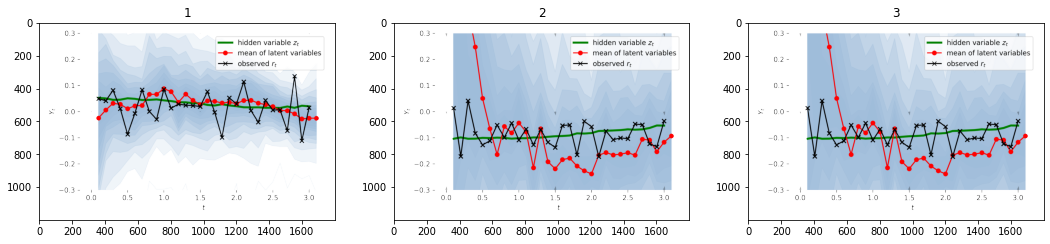

In [14]:
time_series_1=mpimg.imread('./img_part1_a/time_series_1.png')
time_series_2=mpimg.imread('./img_part1_a/time_series_2.png')
time_series_3=mpimg.imread('./img_part1_a/time_series_3.png')

fig, axes = plt.subplots(1,3,figsize=(18,8))
axes[0].imshow(time_series_1)
axes[0].set_title("1")
axes[1].imshow(time_series_2)
axes[1].set_title("2")
axes[2].imshow(time_series_3)
axes[2].set_title("3")

经过对prior distribution的调节，可以看出很依赖于我们假设的prior，如果我们假设正确的话，还是能够趋近于observations。能看到经过一些参数调整之后，$Z_t$还是能够趋近$X_t$的变化方向，没有办法达到很接近是因为
1. simulated time series存在不可预测的随机变化
2. 我们假设的prior 是O-U process, simulated time series不一定能够被O-U process 完整表达
3. O-U process 的dynamics被他的参数theta，sigma和mu所影响，我们所定的参数很大程度影响我们跑出来的sde，在调这些参数的过程中，能看见随着参数的变化，学出来的$Z_t$变化很大。我们可以根据对observation的观察，稍微修改他们

O-U process: $dX_t = \Theta(\mu-X_t)dt+\sigma dW_t$
1. $\Theta$越大，均值回归的速度越大
2. $\mu$就是均值所在
3. $\sigma$表示噪音的大小变化